Modeling of light propagation through layered structures using **transfer matrix** approach: https://en.wikipedia.org/wiki/Transfer-matrix_method_(optics)

In [1]:
import os
os.chdir('..')

import numpy as np
import matplotlib.pyplot as plt
from os import listdir

from transfer_matrix.structures import LayeredStructure

In [6]:
sorted(listdir('structures'))

['bragg_mirror.txt',
 'simple_interface.txt',
 'surface_plasmon_resonance_gold.txt',
 'unnamed_resonance.txt']

#### Fixed wavelength

In [7]:
def plot_predictions_fixed_wavelength(model, lambd=1., polarizations='SP'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    for polarization in polarizations: 
        angles, reflection_coefs = model.get_reflection_coefs_fixed_wavelength(lambd, polarization)
        ax1.plot(angles, np.square(np.abs(reflection_coefs)), label='{}'.format(polarization))
        ax2.plot(angles, np.angle(reflection_coefs), label='{}'.format(polarization))


    fig.suptitle('$\lambda$ = {} $\mu$m'.format(lambd))
    ax1.set_xlabel('Angle, °')
    ax1.set_ylabel('Reflectance')
    ax1.legend()

    ax2.set_xlabel('Angle, °')
    ax2.set_ylabel('Reflection phase')
    ax2.legend()

https://en.wikipedia.org/wiki/Fresnel_equations

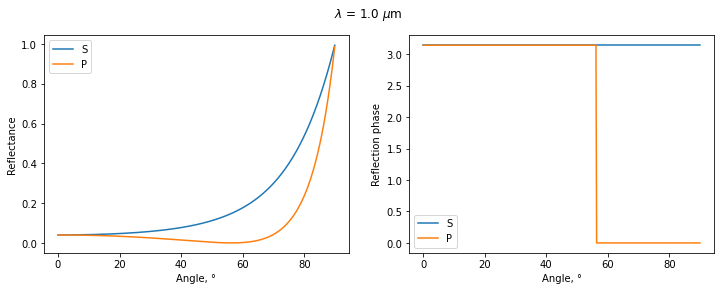

In [8]:
model = LayeredStructure('structures/simple_interface.txt')
plot_predictions_fixed_wavelength(model, lambd=1., polarizations='SP')

https://en.wikipedia.org/wiki/Surface_plasmon_resonance

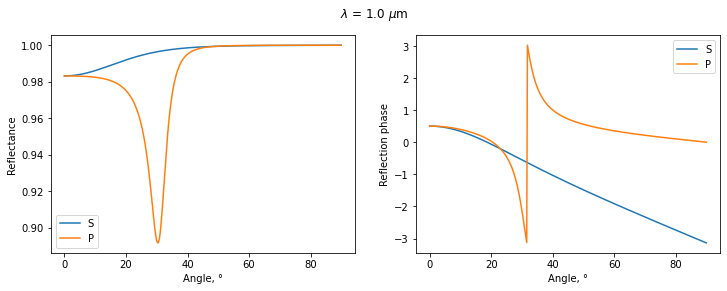

In [9]:
model = LayeredStructure('structures/surface_plasmon_resonance_gold.txt')
plot_predictions_fixed_wavelength(model, lambd=1., polarizations='SP')

---

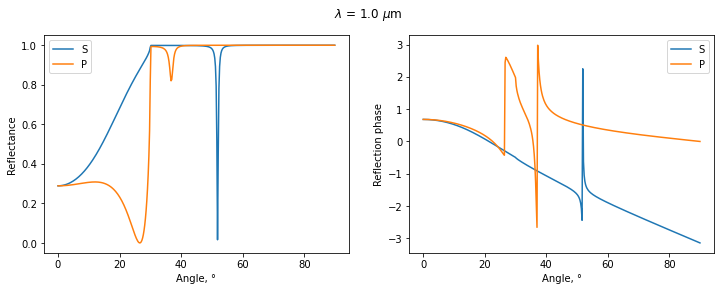

In [10]:
model = LayeredStructure('structures/unnamed_resonance.txt')
plot_predictions_fixed_wavelength(model, lambd=1., polarizations='SP')

#### Fixed angles and polarizations

In [11]:
def plot_predictions_fixed_angles(model, angles, polarizations='SP', lambd_min=0.1, lambd_max=0.8):
    for angle, polarization in zip(angles, polarizations): 
        wavelengths, reflection_coefs =\
                    model.get_reflection_coefs_fixed_angle(angle, polarization, lambd_min, lambd_max)
        plt.plot(wavelengths, np.square(np.abs(reflection_coefs)), label='{}, {}°'.format(polarization, angle))
    plt.xlabel('$\lambda$, $\mu$m')
    plt.ylabel('Reflectance')
    plt.legend()

https://en.wikipedia.org/wiki/Dielectric_mirror

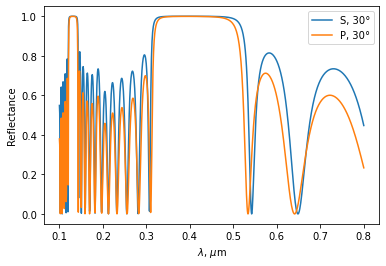

In [12]:
model = LayeredStructure('structures/bragg_mirror.txt')
plot_predictions_fixed_angles(model, angles=[30, 30], polarizations='SP', lambd_min=0.1, lambd_max=0.8)